# Neural Network: Basic Classification

*Source: https://www.tensorflow.org/tutorials/keras/basic_classification*

In [1]:
import sys
!echo {sys.prefix}

/opt/conda


In [ ]:
!conda install -p {sys.prefix} tensorflow numpy matplotlib --yes --force-reinstall

In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

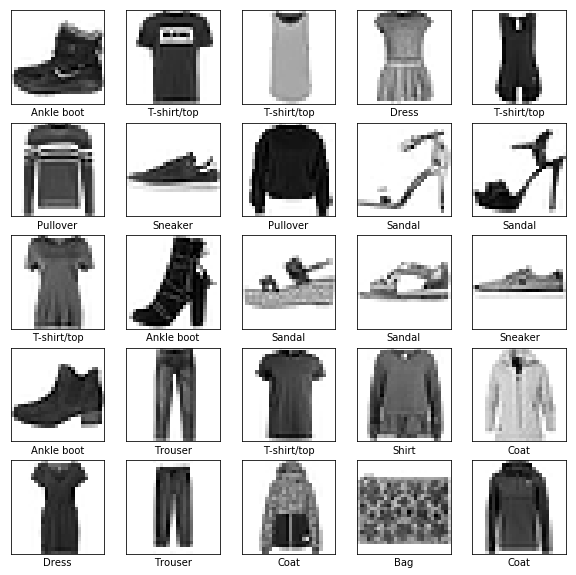

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5011 - acc: 0.8236
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3767 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3403 - acc: 0.8752
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3132 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2965 - acc: 0.8899


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3473 - acc: 0.8752
Test accuracy: 0.8752


In [12]:
predictions = model.predict(test_images[0:20])

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


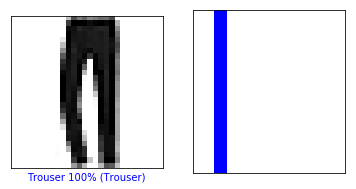

In [14]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

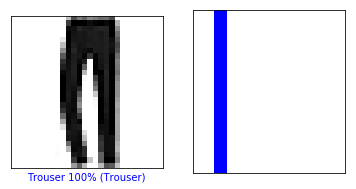

In [15]:

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [16]:
len(predictions)

20

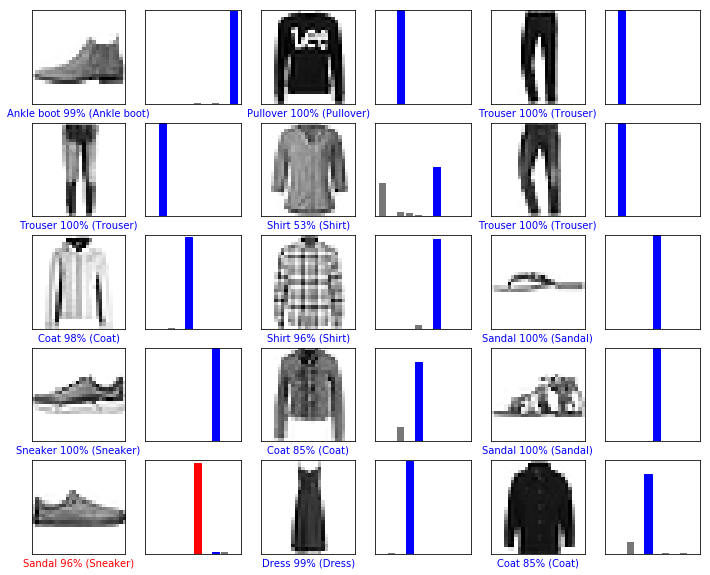

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols*2, i*2+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, num_cols*2, i*2+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [18]:
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [19]:
predictions_single = model.predict(img)

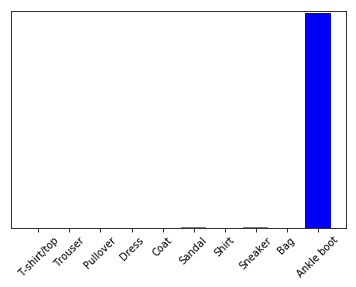

In [20]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)